# Аналитический кейс 


## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Описание данных представлен файл games.csv:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Содержание.

<a href="#Откроем-файл-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Откроем-файл-с-данными-и-изучим-общую-информацию">Откроем файл с данными и изучим общую информацию</a><br>
<a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных">Подготовка данных</a><br>
<a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных">Исследовательский анализ данных</a><br>
<a href="#Составим-портрет-пользователя-каждого-региона" data-toc-modified-id="Составим-портрет-пользователя-каждого-региона">Составим портрет пользователя каждого региона</a><br>
<a href="#Проверим-гипотезы" data-toc-modified-id="Проверим-гипотезы">Проверим гипотезы</a><br>
<a href="#Общий-вывод" data-toc-modified-id="Общий-вывод">Общий вывод</a><br>


## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
data=pd.read_csv("games.csv")
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Анализируем каждый столбец.

In [3]:
#Анализатор для всего датафрейма.
def series_analiser(series):
    print("________________","________________")
    print(series.name)
    try: 
        print(f"Для этого столбца Среднеее значение:{series.mean()}" + "\n" + f"Максимальное значение: {series.max()}"+ "\n" + f"Минимальное значение: {series.min()}"+ "\n" + f"Всего наблюдений: {series.count()}" + "\n" + f"Уникальные значения: {series.unique()}"+ "\n" + f"Пропущенные значения: {series.isna().sum()}")
    except:
        print(f"Для этого столбца" + "\n" f"Всего наблюдений: {series.count()}" + "\n" + f"Уникальные значения: {series.unique()}" + "\n" + f"Пропущенные значения: {series.isna().sum()}")

def data_analiser(data):
    for i in data.columns:
        series_analiser(data[i])

In [4]:
data_analiser(data)# Применим.

________________ ________________
Name
Для этого столбца
Всего наблюдений: 16713
Уникальные значения: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Пропущенные значения: 2
________________ ________________
Platform
Для этого столбца
Всего наблюдений: 16715
Уникальные значения: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Пропущенные значения: 0
________________ ________________
Year_of_Release
Для этого столбца Среднеее значение:2006.4846163200777
Максимальное значение: 2016.0
Минимальное значение: 1980.0
Всего наблюдений: 16446
Уникальные значения: [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1

Проверим дубликаты.

In [5]:
data.duplicated().sum()

0

Проверим пропуски.

In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод.

Приведем названия столбцов к нижнему регистру, по условию задания.

1) Пропуски в столбцах:
* Name 2
* Year_of_Release 269
* Genre 2 
Можно удалить, они не более 2х процентов датасета.


2) Пропуски в столбцах:
* Critic_Score
* User_Score
* Rating
Не могут быть удалены из-за большого количества.


3) Формат данных:
* Year_of_Release 
Исправим на int.


4) Формат данных:
* User_Score 
исправим на флоат, решим проблему tbd.


5) Формат данных:
* Critic_Score 
исправим на int.

## Подготовка данных


In [7]:
data.columns = data.columns.str.lower() # Исправляем столбцы.
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
#Удалим пропуски в выше описанных столбцах.
data.dropna(subset=["name", "year_of_release", "genre"], inplace=True)
data.isna().sum()


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Меняем форматы данных.

In [9]:

data['year_of_release'] =data['year_of_release'].astype('Int64')
data['user_score']=data['user_score'].replace('tbd', np.NaN)
data['user_score'] = pd.to_numeric(data['user_score'])
data['rating']=data['rating'].fillna('Нет рейтинга')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Добавим столбец с суммарной выручкой.

In [10]:
data['total_price']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_price
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Нет рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Нет рейтинга,31.38


## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

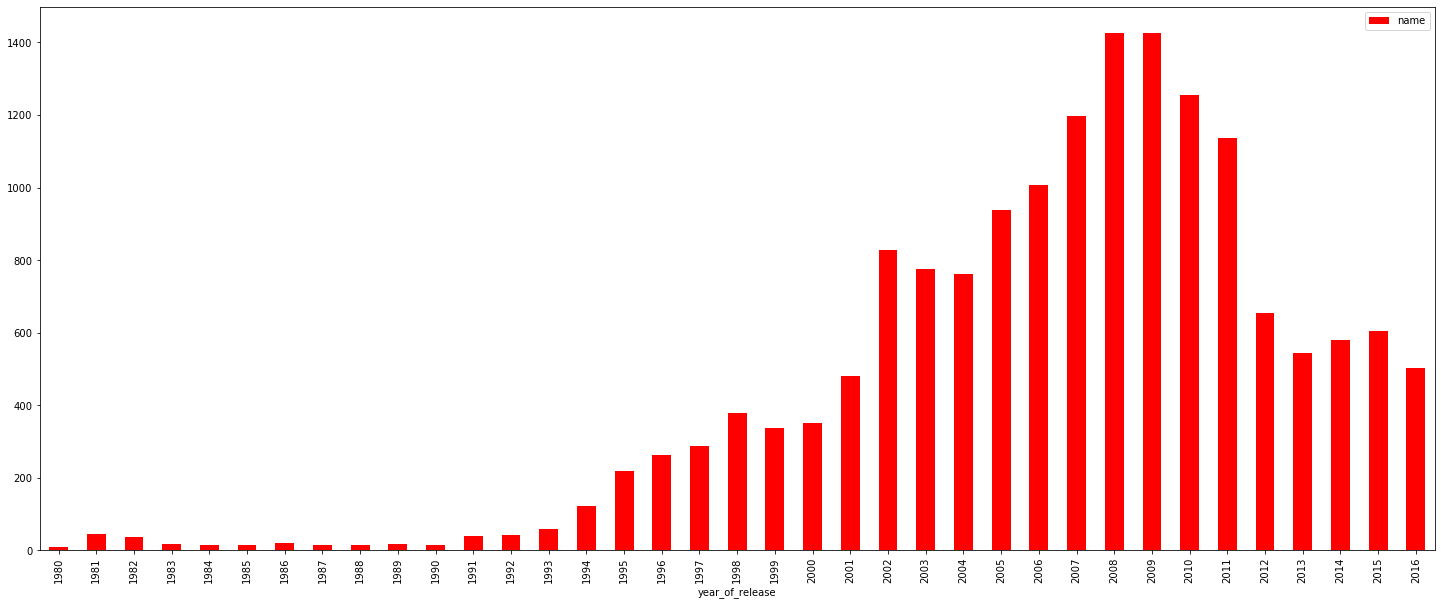

In [11]:
data_games_of_yar = data.pivot_table(index='year_of_release', values=['name'], aggfunc='count')
data_games_of_yar
data_games_of_yar.plot(y='name',kind= 'bar', figsize = (25,10), color = 'red')

### Резкий рост популярности платформ начался в 2002 году, в 2010 году начался медленный спад.

Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [12]:
top_platforms=data.groupby('platform')['total_price'].sum().sort_values(ascending = False)
top_platforms.head(10).index.values

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

Искомые платформы с максимальными продажами.

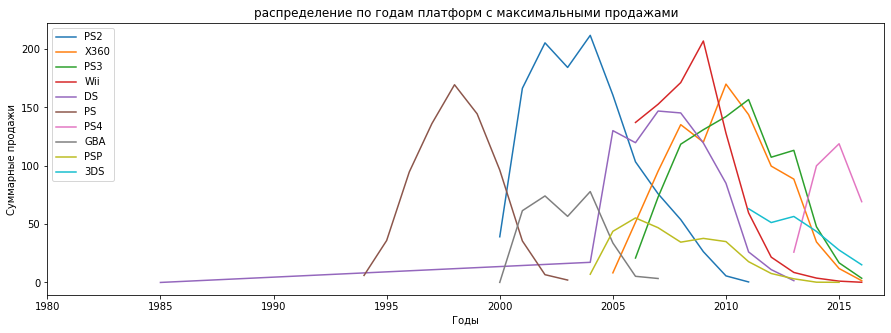

In [13]:
data_platform_yars=data.pivot_table(index=['platform','year_of_release'], values = 'total_price', aggfunc = 'sum')
#data_platform_yars

fig, ax = plt.subplots(figsize =(15,5))
plt.title('распределение по годам платформ с максимальными продажами')
for platform in top_platforms.head(10).index.values:
    data_platform_yars.loc[platform].rename(columns={'total_price': platform}).plot(ax=ax)
ax.set_xlim([1980,2017])
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.show()


### Вывод: в среднем платформы живут около 10 лет, чуть меньше или чуть больше. Актуальным периодом можно считать период с 2013 года, так как на нем присутствуют все платформы, которые будут продаваться и в 2017 году, отсутствуют платформы которые уже не актуальны, при этом определяется стойкая устоявшаяся динамика продаж.

Создадим срез для дальнейшего анализа.

In [14]:
real_data = data.query('2013 <= year_of_release <= 2016') 
real_data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_price
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Нет рейтинга,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Нет рейтинга,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01


In [15]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_price      2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


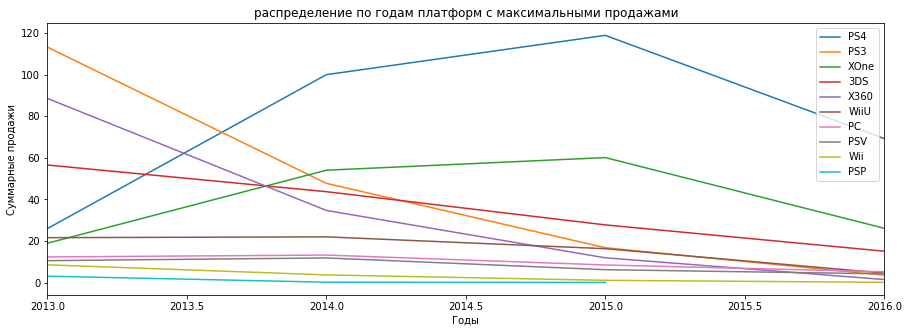

In [16]:
top_platforms_real=real_data.groupby('platform')['total_price'].sum().sort_values(ascending = False)
real_data_platform_yars=real_data.pivot_table(index=['platform','year_of_release'], values = 'total_price', aggfunc = 'sum')

fig, ax = plt.subplots(figsize =(15,5))
plt.title('распределение по годам платформ с максимальными продажами')
for platform in top_platforms_real.head(10).index.values:
    real_data_platform_yars.loc[platform].rename(columns={'total_price': platform}).plot(ax=ax)
ax.set_xlim([2013,2016])
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.show()



### Из графика видно, что все платформы теряют продажи. Лучше всех дела обстоят у PS 4.

#### Строю график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

(0, 2)

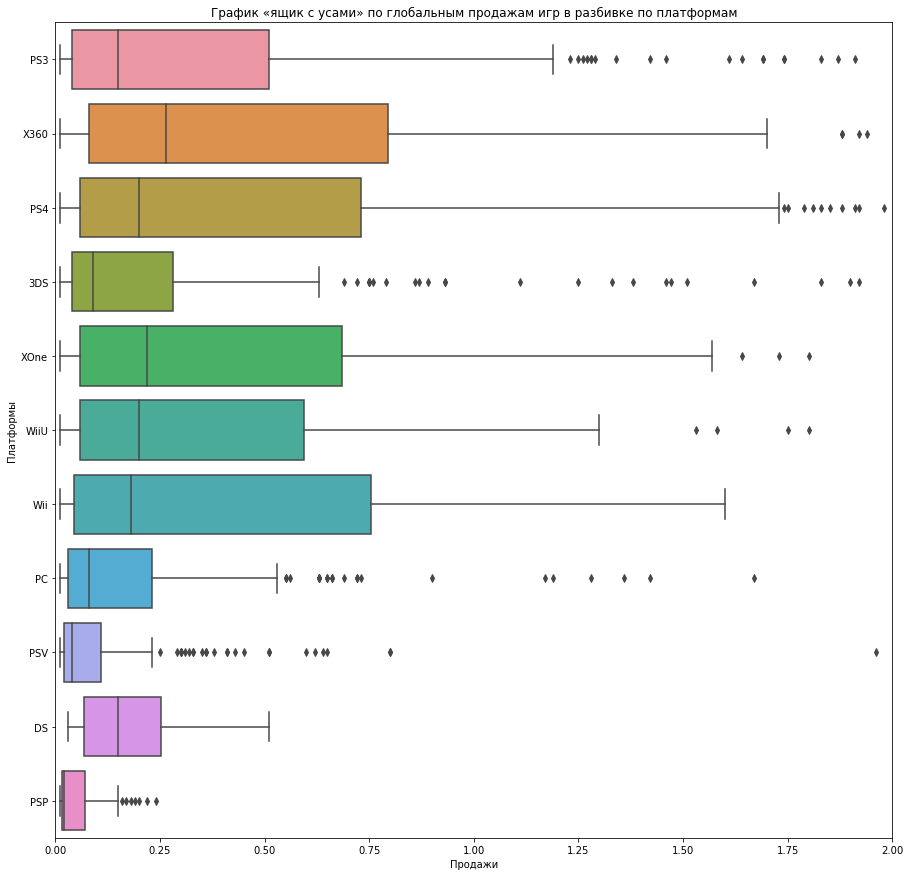

In [17]:
plt.figure(figsize=(15,15))
sns.boxplot(data=real_data, x='total_price', y="platform")
plt.title(label='График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel("Продажи")
plt.ylabel("Платформы")
plt.xlim(0,2,0)



#### Чем больше среднее значение и большая часть диаграммы размаха сдвинута вправо, тем популярнее платформа.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

### Отзывы критиков.

Корреляция между отзывами критиков и продажами PS4 0.40656790206178095
Корреляция между отзывами критиков и продажами PS3 0.3342853393371919
Корреляция между отзывами критиков и продажами XOne 0.41699832800840186
Корреляция между отзывами критиков и продажами 3DS 0.35705661422881035
Корреляция между отзывами критиков и продажами X360 0.3503445460228664
Корреляция между отзывами критиков и продажами WiiU 0.3764149065423913
Корреляция между отзывами критиков и продажами PC 0.19603028294369382
Корреляция между отзывами критиков и продажами PSV 0.2547423503068656
Корреляция между отзывами критиков и продажами Wii nan
Корреляция между отзывами критиков и продажами PSP nan


/home/gennalll/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/gennalll/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


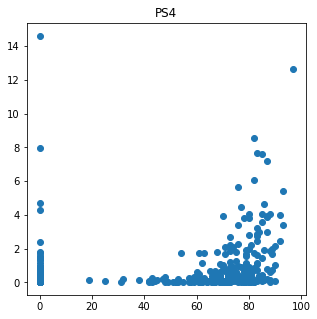

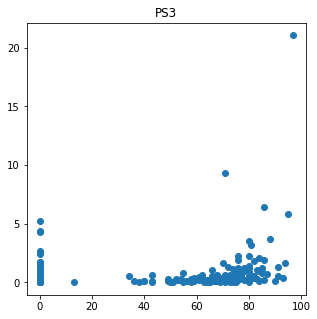

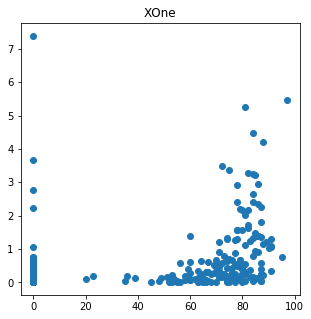

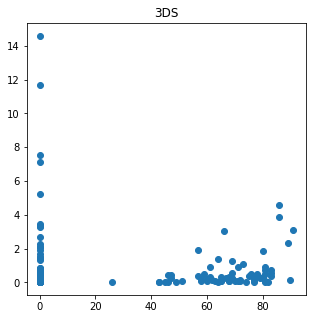

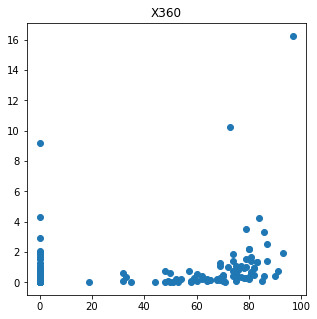

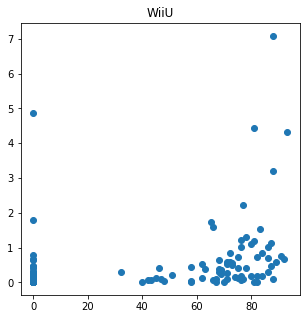

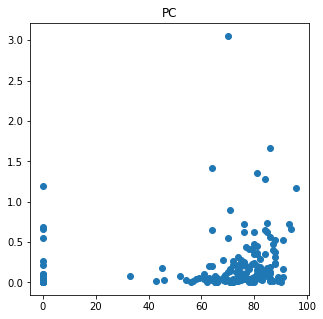

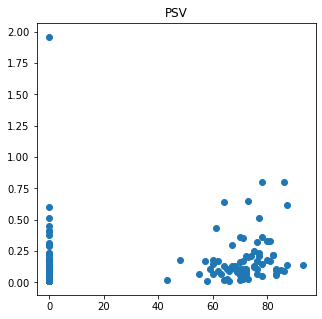

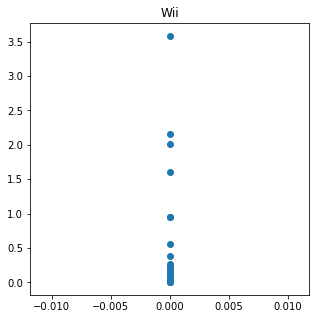

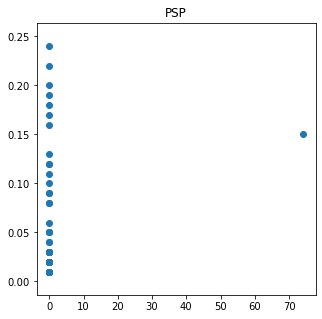

In [18]:
def critics_total_price_platform(name):
    platform_critic_table = real_data[real_data['platform']==name]['critic_score'].fillna(0) #Ноль на графике будет означать отсутствие оценки.
    total_price_platform_table = real_data[real_data['platform']==name]['total_price'].fillna(0)
    fig = plt.figure(figsize=(5, 5))
    plt.title(label=name)
    plt.scatter(platform_critic_table, total_price_platform_table, )
    
    print("Корреляция между отзывами критиков и продажами", name, platform_critic_table[platform_critic_table!=0].astype(float).corr(total_price_platform_table))


    
    
for i in top_platforms_real.head(10).index.values:
    critics_total_price_platform(i)
    
    


### Отзывы критиков однозначно влияют на продажи игр, при этом лучше всего продаются игры с оценками более 60. Есть платформы, у которых почти нет критических отзывов (WII и PSP).

### Отзывы пользователей.

Корреляция между отзывами пользователей и продажами PS4 -0.03195711020455645
Корреляция между отзывами пользователей и продажами PS3 0.0023944027357566955
Корреляция между отзывами пользователей и продажами XOne -0.06892505328279414
Корреляция между отзывами пользователей и продажами 3DS 0.2415041177356301
Корреляция между отзывами пользователей и продажами X360 -0.011742185147181325
Корреляция между отзывами пользователей и продажами WiiU 0.4193304819266187
Корреляция между отзывами пользователей и продажами PC -0.09384186952476739
Корреляция между отзывами пользователей и продажами PSV 0.0009424723319108623
Корреляция между отзывами пользователей и продажами Wii 0.6829417215362368
Корреляция между отзывами пользователей и продажами PSP -0.9999999999999999


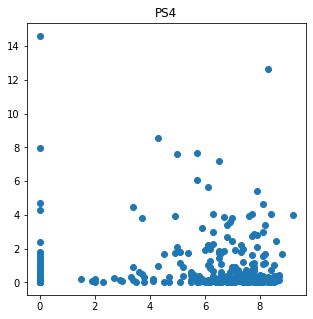

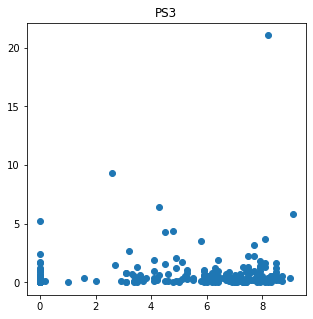

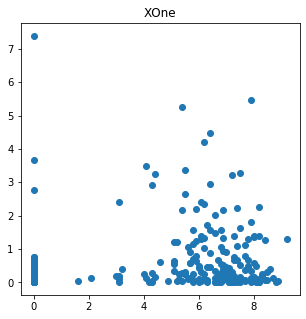

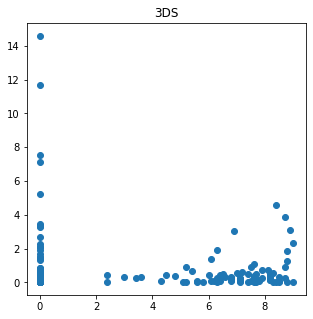

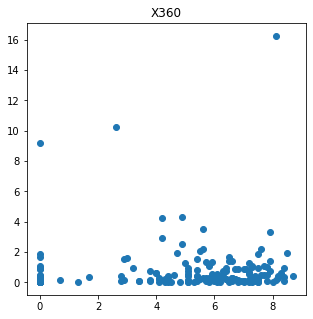

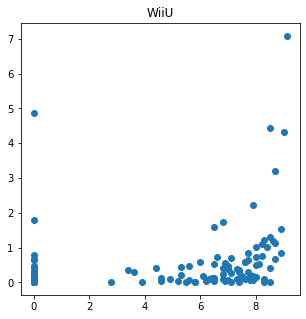

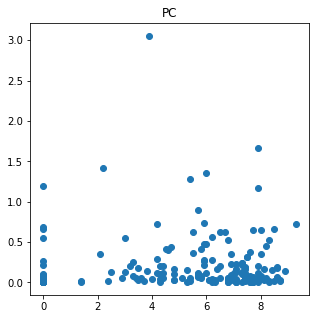

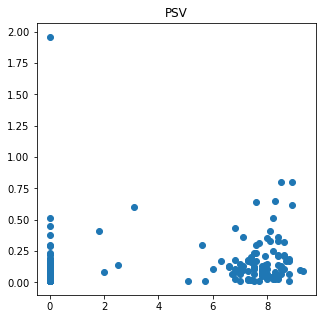

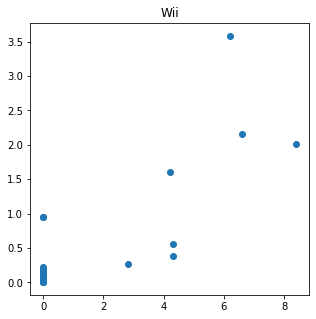

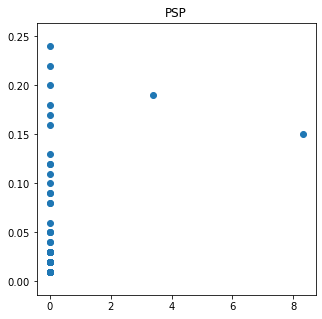

In [19]:
def user_score_total_price_platform(name):
    platform_user_score = real_data[real_data['platform']==name]['user_score'].fillna(0) #Ноль на графике будет означать отсутствие оценки.
    
    platform_user_score = platform_user_score.replace('tbd', 0)
    platform_user_score=pd.to_numeric(platform_user_score)
    total_price_platform_table = real_data[real_data['platform']==name]['total_price'].fillna(0)
    fig = plt.figure(figsize=(5, 5))
    plt.title(label=name)
    plt.scatter(platform_user_score, total_price_platform_table)
    
    print("Корреляция между отзывами пользователей и продажами", name, platform_user_score[platform_user_score!=0].astype(float).corr(total_price_platform_table))

for i in top_platforms_real.head(10).index.values:
    user_score_total_price_platform(i)
    


### Отзывы пользователей влияют на продажи, но меньше. При этом выраженный рост наблюдается где-то на уровне 4-х. WII и PSP опять имеют меньше всего отзывов.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [20]:
real_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_price
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Нет рейтинга,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Нет рейтинга,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Нет рейтинга,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,Нет рейтинга,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [21]:
ganre_count=real_data['genre'].value_counts()
ganre_count

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

#### Ожидаемо игр жанра, экшен больше всего.

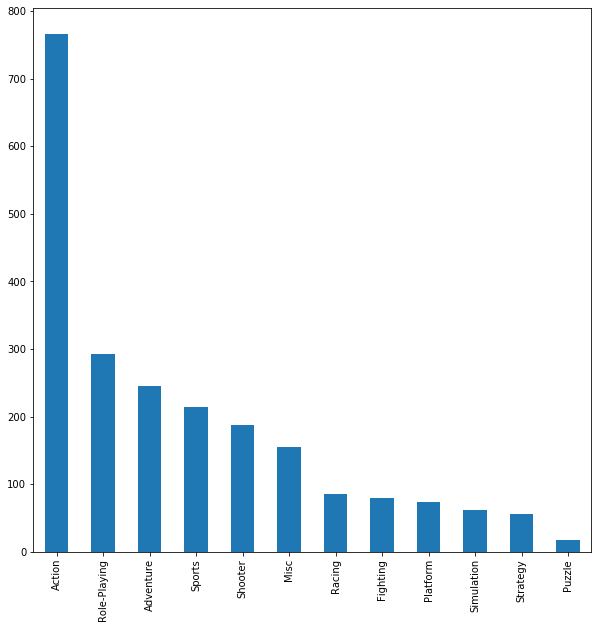

In [22]:
ganre_count.plot(kind='bar', figsize=(10, 10), legend=False)


Сделаем таблицу продаж в зависимости от жанра.

In [23]:
ganre_price=real_data.pivot_table(index='genre', aggfunc={'total_price':sum})
ganre_price=ganre_price.sort_values(by='total_price', ascending=False)
ganre_price



,total_price
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [24]:
ganre_price=real_data.pivot_table(index='genre', aggfunc={'total_price':np.mean})
ganre_price=ganre_price.sort_values(by='total_price', ascending=False)
ganre_price


,total_price
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


In [25]:
ganre_price=real_data.pivot_table(index='genre', aggfunc={'total_price':np.median})
ganre_price=ganre_price.sort_values(by='total_price', ascending=False)
ganre_price


,total_price
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


#### По количеству игр и суммарному заработку ожидаемо лидируют экшены. Шутеров выпускается  не так много, но они на втором месте по заработку. Ролевые игры и приключения тоже выпускаются в большом количестве, но не имеют такого экономического успеха. Обращают на себя внимание стратегии, их и мало выпускается и они мало зарабатывают.

### Составим портрет пользователя каждого региона

In [26]:
platform_region = real_data.pivot_table(index = 'platform', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
rating_region=pd.DataFrame(platform_region)
rating_region.columns = ['na_sales','jp_sales','eu_sales']
rating_region.head()

,na_sales,jp_sales,eu_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74


In [27]:
rating_region_genre = real_data.pivot_table(index = 'genre', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
rating_region_genre.columns = ['na_sales','jp_sales','eu_sales']
rating_region_genre.head()

,na_sales,jp_sales,eu_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14


In [28]:
rating_region_raiting = real_data.pivot_table(index = 'rating', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
rating_region_raiting.columns = ['na_sales','jp_sales','eu_sales']
rating_region_raiting.head(30)

,na_sales,jp_sales,eu_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
Нет рейтинга,78.91,85.05,89.42


Сделаем функцию для сортировки данных по таблицам рейтинга.

In [29]:
def sort_raiting(df):
    print("Продажи в Северной Америке (миллионы проданных копий)")
    display(df.sort_values(by = 'na_sales',ascending = False)['na_sales'])
    print("Продажи в Японии (миллионы проданных копий)")
    display(df.sort_values(by = 'jp_sales',ascending = False)['jp_sales'])
    print("Продажи в Европе (миллионы проданных копий)")
    display(df.sort_values(by = 'eu_sales',ascending = False)['eu_sales'])

#### Продажи по платформам.

In [30]:
sort_raiting(rating_region)

Продажи в Северной Америке (миллионы проданных копий)


platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
PC       25.36
WiiU     19.85
PSV       6.10
Wii       5.93
DS        0.85
PSP       0.17
Name: na_sales, dtype: float64

Продажи в Японии (миллионы проданных копий)


platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
PSP      3.29
X360     0.51
XOne     0.34
Wii      0.05
DS       0.00
PC       0.00
Name: jp_sales, dtype: float64

Продажи в Европе (миллионы проданных копий)


platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
WiiU     29.21
PC       11.11
Wii       6.56
PSV       5.04
DS        0.57
PSP       0.00
Name: eu_sales, dtype: float64

#### Доли продаж платформ в регионах Северной Америке и  Европе отличаются незначительно Обращает на себя внимание большая доля платформ от компании Microsoft. При этом Япония резко отличается за счет 3DS и WII. Обе консоли разработаны в Японии.  Видимо, консоли разработанные в культурно близкой стране ближе пользователям.

#### Продажи по жанрам.

In [31]:
sort_raiting(rating_region_genre)

Продажи в Северной Америке (миллионы проданных копий)


genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Misc             20.04
Platform         15.58
Simulation       10.92
Fighting          8.55
Adventure         8.25
Strategy          4.22
Puzzle            1.00
Name: na_sales, dtype: float64

Продажи в Японии (миллионы проданных копий)


genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Adventure        5.82
Sports           5.41
Platform         4.79
Simulation       4.52
Racing           2.30
Strategy         1.77
Puzzle           1.18
Name: jp_sales, dtype: float64

Продажи в Европе (миллионы проданных копий)


genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Platform         18.14
Fighting         15.55
Racing           12.96
Adventure         7.14
Simulation        4.86
Strategy          3.28
Puzzle            0.83
Name: eu_sales, dtype: float64

#### Опять выделяется Япония, за счет  преобладания Role-Playing и Fighting, вероятно культурные особенности.

#### Продажи по рейтингу.

In [32]:
sort_raiting(rating_region_raiting)

Продажи в Северной Америке (миллионы проданных копий)


rating
M               145.32
E                83.36
Нет рейтинга     78.91
E10+             42.69
T                41.95
Name: na_sales, dtype: float64

Продажи в Японии (миллионы проданных копий)


rating
Нет рейтинга    85.05
T               20.59
E               15.14
M               14.11
E10+             5.89
Name: jp_sales, dtype: float64

Продажи в Европе (миллионы проданных копий)


rating
M               165.21
Нет рейтинга     89.42
E                79.05
E10+             54.24
T                49.79
Name: eu_sales, dtype: float64

#### И опять выделяется Япония - преобладают игры для подростков, а игры 17+ наоборот занимают малую часть рынка.

### Проверим гипотезы

####  Сформулируем гипотезы
* Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются;
 

In [33]:
xone_platform=real_data.query('platform == "XOne"')

xone_platform=xone_platform[xone_platform['user_score'].isna() != True]
pc_platform=real_data.query('platform == "PC"')
pc_platform=pc_platform[pc_platform['user_score'].isna() != True]

print(xone_platform.info())
print(pc_platform.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 165 to 16660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             182 non-null    object 
 1   platform         182 non-null    object 
 2   year_of_release  182 non-null    Int64  
 3   genre            182 non-null    object 
 4   na_sales         182 non-null    float64
 5   eu_sales         182 non-null    float64
 6   jp_sales         182 non-null    float64
 7   other_sales      182 non-null    float64
 8   critic_score     165 non-null    float64
 9   user_score       182 non-null    float64
 10  rating           182 non-null    object 
 11  total_price      182 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 18.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --

In [34]:
alpha = .05
result = st.ttest_ind(
   xone_platform['user_score'], 
   pc_platform["user_score"])
print('p-значение:', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: да, похоже это так.

####  Сформулируем гипотезы

* Нулевая гипотеза: Средние пользовательские рейтинги жанров Action  и Sports одинаковые.

* Альтернативна гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.
                                                                     
                                                                     



In [35]:
action_score=real_data.query('genre == "Action"')

#action_score =action_score.dropna(subset = 'user_score')
action_score=action_score[action_score['user_score'].isna() != True]
sports_score=real_data.query('genre == "Sports"')
#sports_score=sports_score.dropna(subset = 'user_score')
sports_score=sports_score[sports_score['user_score'].isna() != True]
print(action_score.info())
print(sports_score.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             389 non-null    object 
 1   platform         389 non-null    object 
 2   year_of_release  389 non-null    Int64  
 3   genre            389 non-null    object 
 4   na_sales         389 non-null    float64
 5   eu_sales         389 non-null    float64
 6   jp_sales         389 non-null    float64
 7   other_sales      389 non-null    float64
 8   critic_score     309 non-null    float64
 9   user_score       389 non-null    float64
 10  rating           389 non-null    object 
 11  total_price      389 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 39.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ----

In [36]:
result_first = st.ttest_ind(action_score['user_score'],
                             sports_score['user_score'],
                             )
prob_second = result_first.pvalue
print('р-значение: ',prob_second)
if prob_second < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports отличаются.

## Общий вывод

Проанализировав из открытых источников доступные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Пришел к следующим выводам.

* Платформы живут около 10 лет, чуть меньше или чуть больше. Актуальным периодом можно считать период с 2013 года, так как на нем присутствуют все платформы которые будут продаваться и в 2017 году
* Из графика видно, что все платформы теряют продажи. Лучше всех дела обстоят у PS 4, Xbox One. Потенциально прибыльные  PS4 , XOne , 3DS 
* Отзывы критиков влияют на продажи игр. Отзывы пользователей влияют на продажи игр для некоторых платформ.
* Самые популярные и покупаемые игры - это Action Shooter Sports Role-Playing Misc.
* Некоторые жанры игр делают продажи за счет количества выпущенных игр, игр других жанров значительно меньше, но они популярнее. 
* Популярные жанры отличаются в разных регионах.
* Возрастной рейтинг по-разному влияет на продажи в разных регионах.
* Отсутствие возростного рейтинга ESRB, не мешает играм продаваться в Японии.

Проверив гипотезы, пришли к следющим выводам.
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action и Sports отличаются.